In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('heart_disease_data.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
df.shape

(918, 12)

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.shape

(918, 12)

In [8]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [9]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [13]:
import matplotlib.pyplot as plt

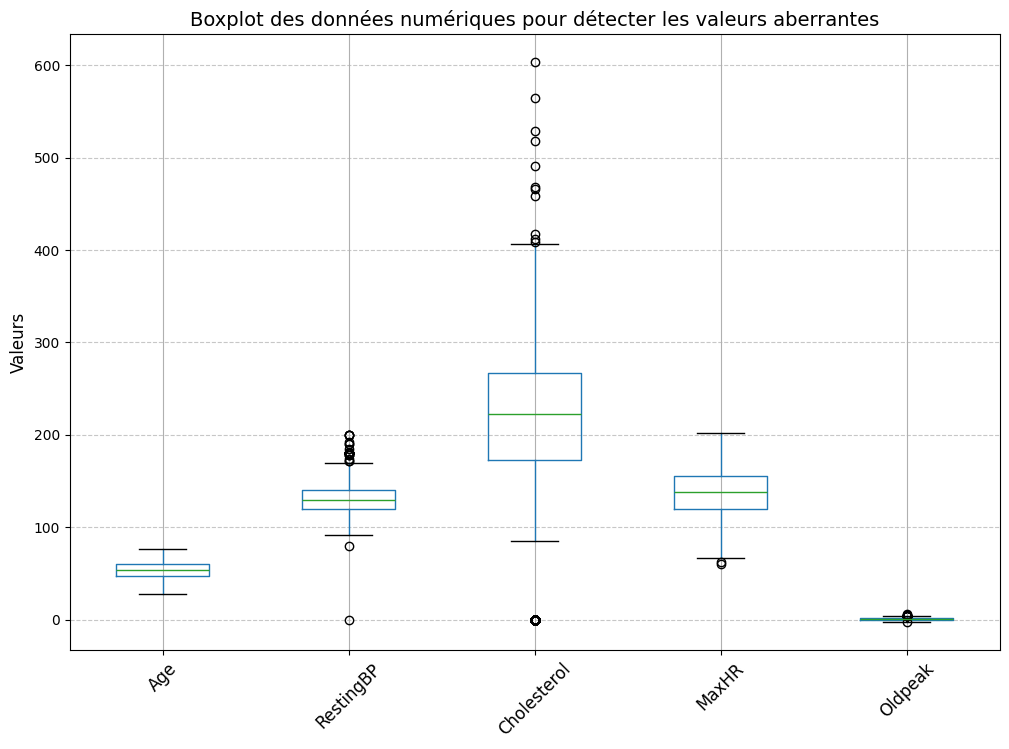

In [14]:

numeric_columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

plt.figure(figsize=(12, 8))
df[numeric_columns].boxplot()
plt.title('Boxplot des données numériques pour détecter les valeurs aberrantes', fontsize=14)
plt.ylabel('Valeurs', fontsize=12)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [15]:
renamed_columns = {
    'Age': 'Âge',
    'Sex': 'Sexe',
    'ChestPainType': 'Type_de_douleur_thoracique',
    'RestingBP': 'Tension_aurepos',
    'Cholesterol': 'Cholestérol',
    'FastingBS': 'Glycémieà_jeun',
    'RestingECG': 'ECG_au_repos',
    'MaxHR': 'Fréquence_cardiaque_max',
    'ExerciseAngina': 'Angine_d_effort',
    'Oldpeak': 'Dépression_ST',
    'ST_Slope': 'Pente_ST',
    'HeartDisease': 'Maladie_cardiaque'
}

df.rename(columns=renamed_columns, inplace=True)


print(df.head())

   Âge Sexe Type_de_douleur_thoracique  Tension_aurepos  Cholestérol  \
0   40    M                        ATA              140          289   
1   49    F                        NAP              160          180   
2   37    M                        ATA              130          283   
3   48    F                        ASY              138          214   
4   54    M                        NAP              150          195   

   Glycémieà_jeun ECG_au_repos  Fréquence_cardiaque_max Angine_d_effort  \
0               0       Normal                      172               N   
1               0       Normal                      156               N   
2               0           ST                       98               N   
3               0       Normal                      108               Y   
4               0       Normal                      122               N   

   Dépression_ST Pente_ST  Maladie_cardiaque  
0            0.0       Up                  0  
1            1.0     F

In [16]:
df[df['Tension_aurepos']==0].shape

(1, 12)

In [42]:
df.drop(df[df['Tension_aurepos'] == 0].index, inplace=True)


In [23]:
df[df['Tension_aurepos']<=50].shape

(1, 12)

In [43]:
df[df['Cholestérol']==0].shape

(171, 12)

In [46]:
median_cholesterol = df['Cholestérol'][df['Cholestérol'] > 0].median()
df['Cholestérol'] = df['Cholestérol'].replace(0, median_cholesterol)

In [47]:
df[df['Cholestérol']==0].shape

(0, 12)

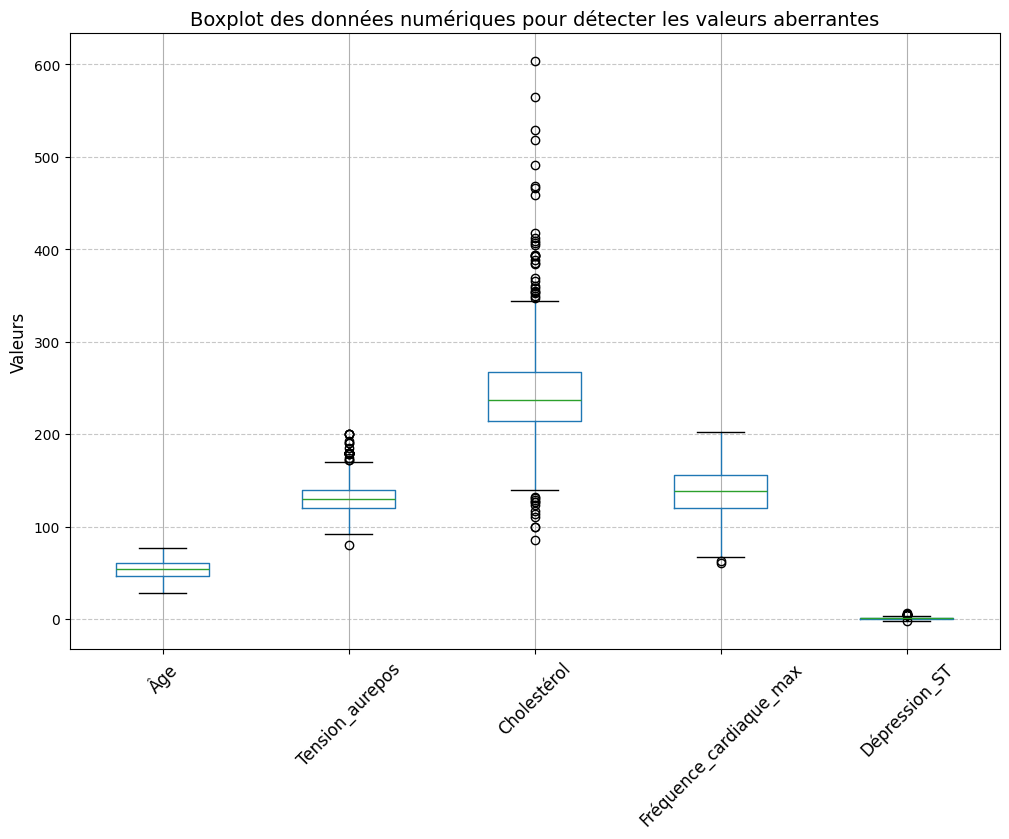

In [49]:

numeric_columns = ['Âge', 'Tension_aurepos', 'Cholestérol', 'Fréquence_cardiaque_max', 'Dépression_ST']
  

plt.figure(figsize=(12, 8))
df[numeric_columns].boxplot()
plt.title('Boxplot des données numériques pour détecter les valeurs aberrantes', fontsize=14)
plt.ylabel('Valeurs', fontsize=12)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [52]:
df['ECG_au_repos'].value_counts()


ECG_au_repos
Normal    551
LVH       188
ST        178
Name: count, dtype: int64

In [53]:
df['Pente_ST'].value_counts()

Pente_ST
Flat    459
Up      395
Down     63
Name: count, dtype: int64

In [54]:
binary_mappings = {
    'Sexe': {'M': 1, 'F': 0},  
    'Angine_d_effort': {'Y': 1, 'N': 0},  

}
for col, mapping in binary_mappings.items():
    df[col] = df[col].map(mapping)

In [55]:
df.head()

,Âge,Sexe,Type_de_douleur_thoracique,Tension_aurepos,Cholestérol,Glycémieà_jeun,ECG_au_repos,Fréquence_cardiaque_max,Angine_d_effort,Dépression_ST,Pente_ST,Maladie_cardiaque
0,40,1,ATA,140,289,0,Normal,172,0,0.0,Up,0
1,49,0,NAP,160,180,0,Normal,156,0,1.0,Flat,1
2,37,1,ATA,130,283,0,ST,98,0,0.0,Up,0
3,48,0,ASY,138,214,0,Normal,108,1,1.5,Flat,1
4,54,1,NAP,150,195,0,Normal,122,0,0.0,Up,0


In [56]:
symptom_columns = ['Type_de_douleur_thoracique', 'ECG_au_repos', 'Pente_ST']
df = pd.get_dummies(df, columns=symptom_columns, drop_first=False)

In [57]:
df

,Âge,Sexe,Tension_aurepos,Cholestérol,Glycémieà_jeun,Fréquence_cardiaque_max,Angine_d_effort,Dépression_ST,Maladie_cardiaque,Type_de_douleur_thoracique_ASY,Type_de_douleur_thoracique_ATA,Type_de_douleur_thoracique_NAP,Type_de_douleur_thoracique_TA,ECG_au_repos_LVH,ECG_au_repos_Normal,ECG_au_repos_ST,Pente_ST_Down,Pente_ST_Flat,Pente_ST_Up
0,40,1,140,289,0,172,0,0.0,0,False,True,False,False,False,True,False,False,False,True
1,49,0,160,180,0,156,0,1.0,1,False,False,True,False,False,True,False,False,True,False
2,37,1,130,283,0,98,0,0.0,0,False,True,False,False,False,False,True,False,False,True
3,48,0,138,214,0,108,1,1.5,1,True,False,False,False,False,True,False,False,True,False
4,54,1,150,195,0,122,0,0.0,0,False,False,True,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,110,264,0,132,0,1.2,1,False,False,False,True,False,True,False,False,True,False
914,68,1,144,193,1,141,0,3.4,1,True,False,False,False,False,True,False,False,True,False
915,57,1,130,131,0,115,1,1.2,1,True,False,False,False,False,True,False,False,True,False
916,57,0,130,236,0,174,0,0.0,1,False,True,False,False,True,False,False,False,True,False


In [60]:
df=df.astype(int)
df

,Âge,Sexe,Tension_aurepos,Cholestérol,Glycémieà_jeun,Fréquence_cardiaque_max,Angine_d_effort,Dépression_ST,Maladie_cardiaque,Type_de_douleur_thoracique_ASY,Type_de_douleur_thoracique_ATA,Type_de_douleur_thoracique_NAP,Type_de_douleur_thoracique_TA,ECG_au_repos_LVH,ECG_au_repos_Normal,ECG_au_repos_ST,Pente_ST_Down,Pente_ST_Flat,Pente_ST_Up
0,40,1,140,289,0,172,0,0,0,0,1,0,0,0,1,0,0,0,1
1,49,0,160,180,0,156,0,1,1,0,0,1,0,0,1,0,0,1,0
2,37,1,130,283,0,98,0,0,0,0,1,0,0,0,0,1,0,0,1
3,48,0,138,214,0,108,1,1,1,1,0,0,0,0,1,0,0,1,0
4,54,1,150,195,0,122,0,0,0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,110,264,0,132,0,1,1,0,0,0,1,0,1,0,0,1,0
914,68,1,144,193,1,141,0,3,1,1,0,0,0,0,1,0,0,1,0
915,57,1,130,131,0,115,1,1,1,1,0,0,0,0,1,0,0,1,0
916,57,0,130,236,0,174,0,0,1,0,1,0,0,1,0,0,0,1,0
